<a href="https://colab.research.google.com/github/MKastek/time-series-notes/blob/main/cost_of_heating_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [393]:
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Input data

In [394]:
data_string = """
invoice issue date,cost of heating
11.2018,65
12.2018,91
1.2019,128
2.2019,123
3.2019,71
4.2019,22
5.2019,10
6.2019,5
7.2019,7
8.2019,8
9.2019,8
10.2019,24
2019-11-11,263
12.2019,385
1.2020,485
2.2020,455
3.2020,534
4.2020,328
5.2020,266
6.2020,281
7.2020,297
8.2020,307
9.2020,341
10.2020,365
11.2020,1225
12.2020,1377
1.2021,1373
2.2021,1153
2021-03-08,1209
4.2021,701
5.2021,569
6.2021,585
7.2021,625
8.2021,699
9.2021,730
10.2021,743
2021-11-09,1765
12.2021,1872
1/2022,1840
2/2022,1704
3/2022,2313
4/2022,1952
5/2022,1755
6/2022,979
7/2022,1271
8/2022,1384
9/2022,1360
10/2022,1363
11/2022,2719
12/2022,2961
"""

### Read Dataframe  
Invoise issue date is in different formats eg. `11.2018`, `2019-11-11`, `12/2022`. Time series ia a sequence of data points organized in time order. The sequence captures data at equally spaced points in time. Data collected irregularly is not considered a time series.  

Invoice issue date is changed to be regularly spaced - first day of month.

In [395]:
df = pd.read_csv(StringIO(data_string))

In [396]:
df

,invoice issue date,cost of heating
0,11.2018,65
1,12.2018,91
2,1.2019,128
3,2.2019,123
4,3.2019,71
5,4.2019,22
6,5.2019,10
7,6.2019,5
8,7.2019,7
9,8.2019,8


In [397]:
def clean_time_data(df: pd.DataFrame, time_column: str)-> pd.DataFrame:
  df[time_column] = df[time_column].apply(lambda x: x.replace('.','/'))
  df[time_column] = pd.to_datetime(df[time_column], errors='coerce');
  df[time_column] = df[time_column].dt.to_period('M').dt.to_timestamp()
  return df

In [398]:
df = clean_time_data(df, 'invoice issue date')

<ipython-input-397-a8ab27a19dee>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[time_column] = pd.to_datetime(df[time_column], errors='coerce');


In [399]:
df

,invoice issue date,cost of heating
0,2018-11-01,65
1,2018-12-01,91
2,2019-01-01,128
3,2019-02-01,123
4,2019-03-01,71
5,2019-04-01,22
6,2019-05-01,10
7,2019-06-01,5
8,2019-07-01,7
9,2019-08-01,8


In [400]:
df = df[df['invoice issue date'] > "2018-11-01"]

In [401]:
df['invoice issue date'] = pd.to_datetime(df['invoice issue date'])  # Replace 'date' with your date column
df = df.set_index('invoice issue date').sort_index()

<ipython-input-401-96b2fcb73109>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['invoice issue date'] = pd.to_datetime(df['invoice issue date'])  # Replace 'date' with your date column


In [402]:
df = df.asfreq('MS')

In [403]:
df

,cost of heating
invoice issue date,
2018-12-01,91
2019-01-01,128
2019-02-01,123
2019-03-01,71
2019-04-01,22
2019-05-01,10
2019-06-01,5
2019-07-01,7
2019-08-01,8


### Time series - plot

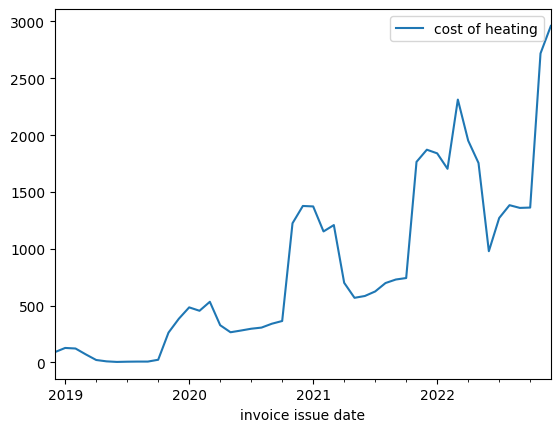

In [404]:
df.plot( y='cost of heating');

In [405]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(x=df['cost of heating'], model='multiplicative')

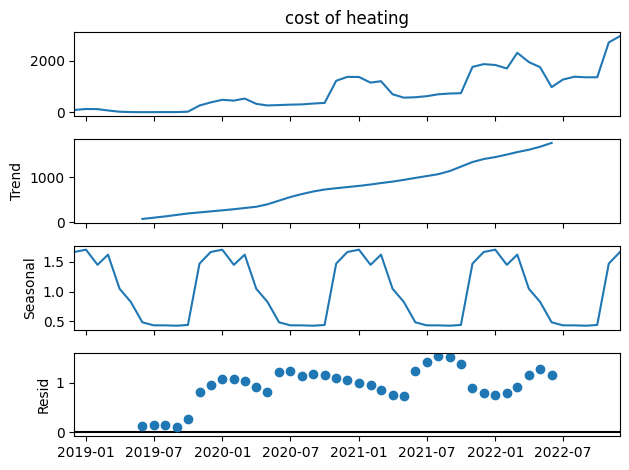

In [406]:
result.plot()
plt.show()

In [407]:
reconstructed = result.trend * result.seasonal * result.resid

In [408]:
df['reconstructed'] = reconstructed
df['trend'] = result.trend
df['seasonal'] = result.seasonal
df['resid'] = result.resid

In [409]:
df

,cost of heating,reconstructed,trend,seasonal,resid
invoice issue date,,,,,
2018-12-01,91,NaN,NaN,1.668643,NaN
2019-01-01,128,NaN,NaN,1.707743,NaN
2019-02-01,123,NaN,NaN,1.451796,NaN
2019-03-01,71,NaN,NaN,1.623841,NaN
2019-04-01,22,NaN,NaN,1.047339,NaN
2019-05-01,10,NaN,NaN,0.825923,NaN
2019-06-01,5,5.0,75.583333,0.481074,0.137509
2019-07-01,7,7.0,102.708333,0.430526,0.158304
2019-08-01,8,8.0,131.416667,0.429698,0.141669


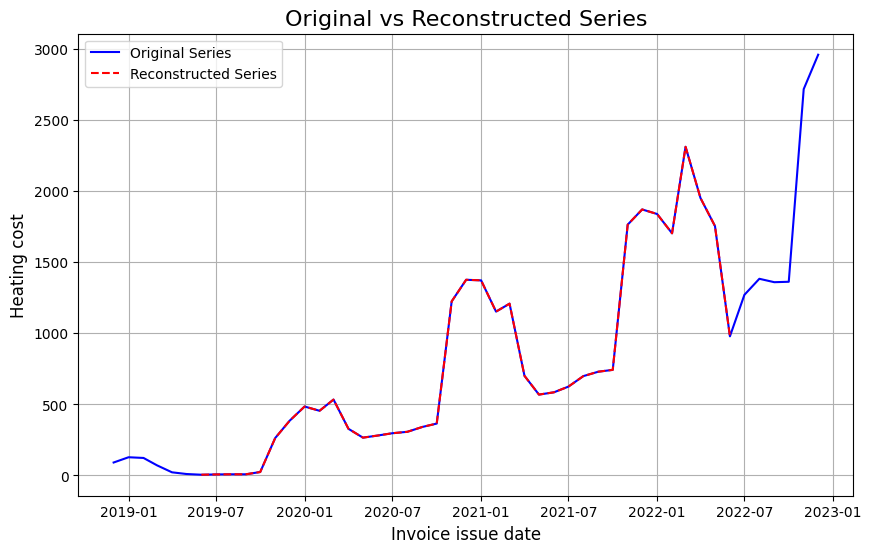

In [410]:
plt.figure(figsize=(10, 6))
plt.plot(df.index,df['cost of heating'], label='Original Series', color='blue')
plt.plot(df.index,reconstructed, label='Reconstructed Series', color='red', linestyle='--')
plt.xlabel("Invoice issue date",fontsize=12)
plt.ylabel("Heating cost",fontsize=12)
plt.legend()
plt.grid()
plt.title("Original vs Reconstructed Series",fontsize=16)
plt.show()

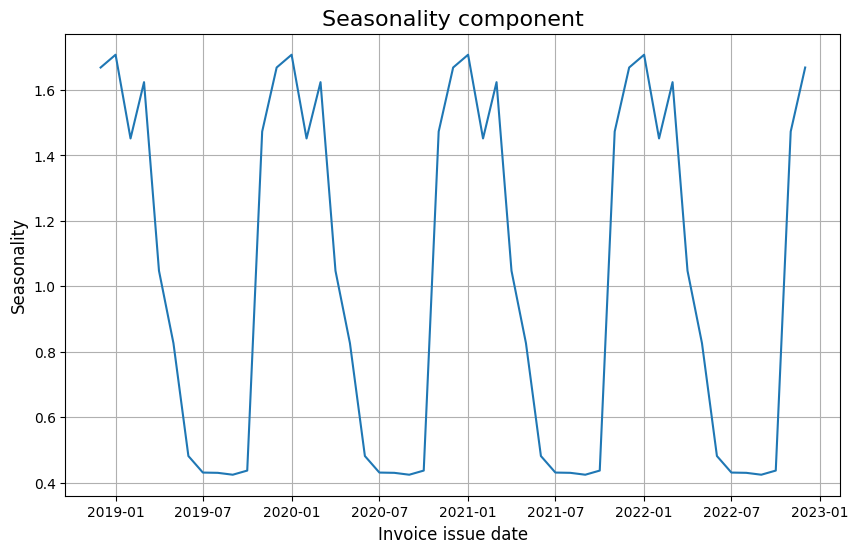

In [411]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, result.seasonal, label='Seasonality')
plt.xlabel("Invoice issue date",fontsize=12)
plt.ylabel("Seasonality",fontsize=12)
plt.title("Seasonality component",fontsize=16)
plt.grid()

In [412]:
pd.DataFrame({'date': df.index, 'seasonality': result.seasonal})

,date,seasonality
invoice issue date,,
2018-12-01,2018-12-01,1.668643
2019-01-01,2019-01-01,1.707743
2019-02-01,2019-02-01,1.451796
2019-03-01,2019-03-01,1.623841
2019-04-01,2019-04-01,1.047339
2019-05-01,2019-05-01,0.825923
2019-06-01,2019-06-01,0.481074
2019-07-01,2019-07-01,0.430526
2019-08-01,2019-08-01,0.429698


In [413]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

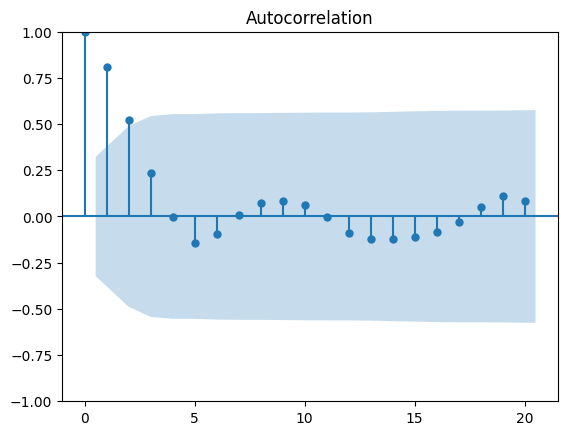

In [414]:
plot_acf(result.resid.dropna(), lags=20)
plt.show()

In [415]:
adf_result = adfuller(result.resid.dropna())
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: -4.091724005192462
p-value: 0.000999485380491237


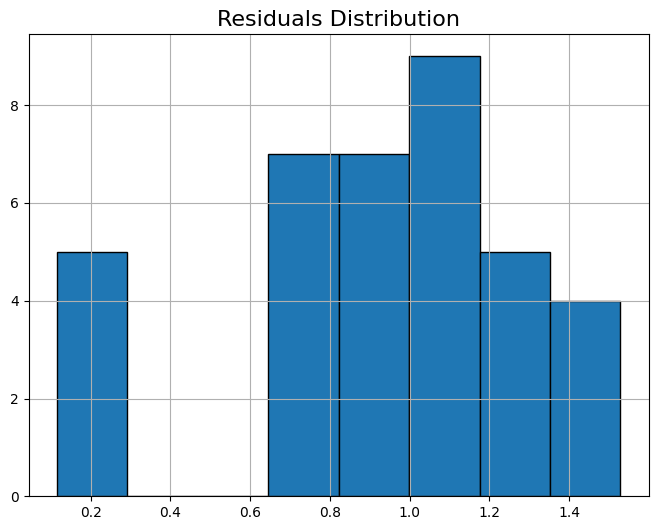

In [416]:
plt.figure(figsize=(8, 6))
plt.hist(result.resid.dropna(), bins=8, edgecolor='black')
plt.grid()
plt.title('Residuals Distribution',fontsize=16)
plt.show()

In [417]:
np.mean(result.resid.dropna())

0.9380521876240393

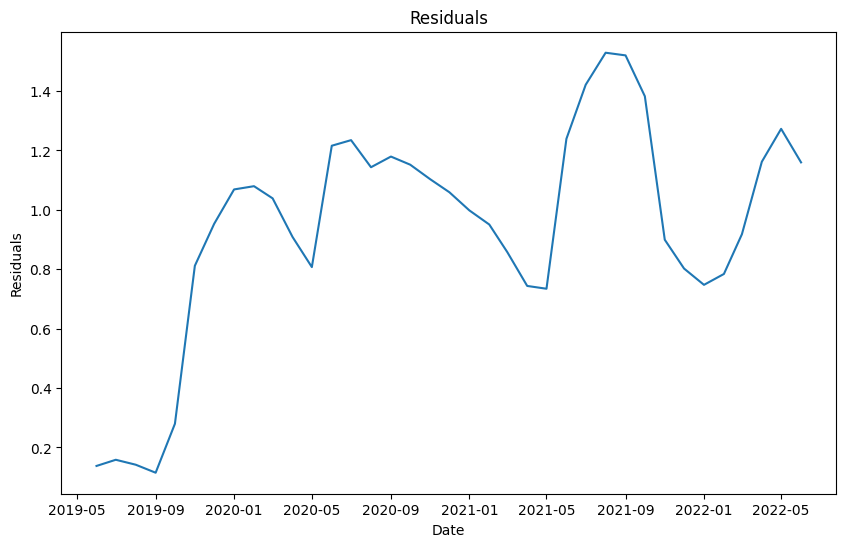

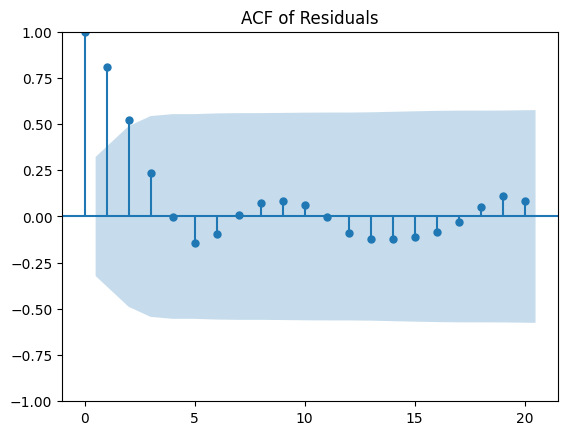

ADF Statistic: -4.091724005192462
p-value: 0.000999485380491237


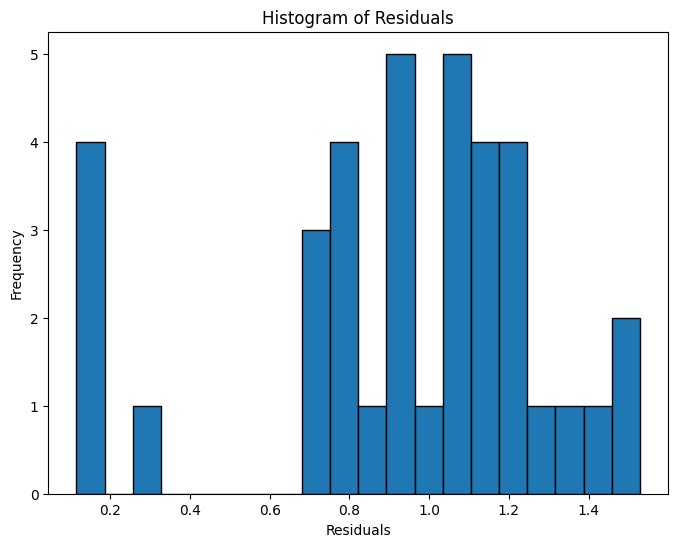

In [418]:
residuals = result.resid.dropna()
# 1. Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

# 2. Plot ACF of residuals (AutoCorrelation Function)
plot_acf(residuals.dropna(), lags=20)
plt.title('ACF of Residuals')
plt.show()

# 3. Perform Augmented Dickey-Fuller test to check for stationarity
adf_result = adfuller(residuals.dropna())
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

# 4. Check for normality of residuals (optional)
plt.figure(figsize=(8, 6))
plt.hist(residuals.dropna(), bins=20, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

### Anomaly detection with Z-score

In [419]:
import scipy.stats as stats

In [420]:
df['z_score'] = np.round(np.abs(stats.zscore(df['cost of heating'])),2)
df['z_score_residual'] =np.round(np.abs(stats.zscore(df['resid'].dropna())),2)

In [421]:
df

,cost of heating,reconstructed,trend,seasonal,resid,z_score,z_score_residual
invoice issue date,,,,,,,
2018-12-01,91,NaN,NaN,1.668643,NaN,0.99,NaN
2019-01-01,128,NaN,NaN,1.707743,NaN,0.94,NaN
2019-02-01,123,NaN,NaN,1.451796,NaN,0.94,NaN
2019-03-01,71,NaN,NaN,1.623841,NaN,1.01,NaN
2019-04-01,22,NaN,NaN,1.047339,NaN,1.08,NaN
2019-05-01,10,NaN,NaN,0.825923,NaN,1.09,NaN
2019-06-01,5,5.0,75.583333,0.481074,0.137509,1.10,2.17
2019-07-01,7,7.0,102.708333,0.430526,0.158304,1.10,2.12
2019-08-01,8,8.0,131.416667,0.429698,0.141669,1.10,2.16


In [422]:
predicate_z_score_residual = df['z_score_residual'] > 1.9
df[predicate_z_score_residual]

,cost of heating,reconstructed,trend,seasonal,resid,z_score,z_score_residual
invoice issue date,,,,,,,
2019-06-01,5,5.0,75.583333,0.481074,0.137509,1.1,2.17
2019-07-01,7,7.0,102.708333,0.430526,0.158304,1.1,2.12
2019-08-01,8,8.0,131.416667,0.429698,0.141669,1.1,2.16
2019-09-01,8,8.0,164.541667,0.423925,0.114690,1.1,2.24


In [423]:
predicate_z_score = df['z_score'] > 1.9
df[predicate_z_score]

,cost of heating,reconstructed,trend,seasonal,resid,z_score,z_score_residual
invoice issue date,,,,,,,
2022-03-01,2313,2313.0,1551.916667,1.623841,0.917833,1.95,0.05
2022-11-01,2719,NaN,NaN,1.472900,NaN,2.49,NaN
2022-12-01,2961,NaN,NaN,1.668643,NaN,2.81,NaN


### Anomaly plot z score

In [424]:
def plot_anomalies(predicate, title):
  plt.figure(figsize=(10, 6))
  plt.plot(df.index, df['cost of heating'], label='Cost of Heating', color='blue', marker='o')
  plt.scatter(df.index[predicate], df['cost of heating'][predicate],
              color='red', label='Anomalies', s=100, edgecolor='black')
  plt.title( title,fontsize=16)
  plt.xlabel('Invoice Issue Date',fontsize=12)
  plt.ylabel('Heating cost',fontsize=12)
  plt.legend()
  plt.grid()

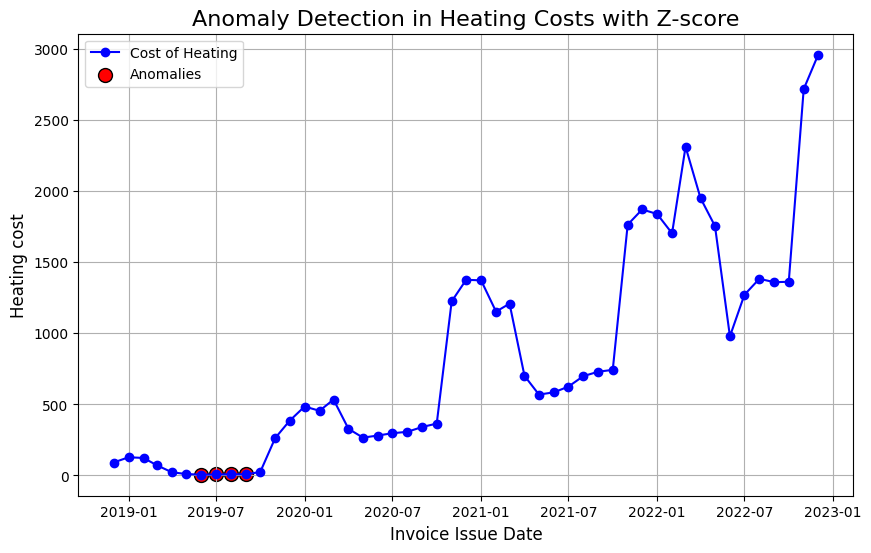

In [425]:
plot_anomalies(predicate_z_score_residual,'Anomaly Detection in Heating Costs with Z-score')

### Moving average

In [426]:
df['centered_moving_avg'] = df['cost of heating'].rolling(window=3, center=True).mean()

In [427]:
df['avg_deviation'] = abs(df['cost of heating'] - df['centered_moving_avg'])

In [428]:
df["z_score_deviation"] = np.round(np.abs(stats.zscore(df['avg_deviation'][1:len(df)-1])),2);

In [429]:
df

,cost of heating,reconstructed,trend,seasonal,resid,z_score,z_score_residual,centered_moving_avg,avg_deviation,z_score_deviation
invoice issue date,,,,,,,,,,
2018-12-01,91,NaN,NaN,1.668643,NaN,0.99,NaN,NaN,NaN,NaN
2019-01-01,128,NaN,NaN,1.707743,NaN,0.94,NaN,114.000000,14.000000,0.65
2019-02-01,123,NaN,NaN,1.451796,NaN,0.94,NaN,107.333333,15.666667,0.64
2019-03-01,71,NaN,NaN,1.623841,NaN,1.01,NaN,72.000000,1.000000,0.76
2019-04-01,22,NaN,NaN,1.047339,NaN,1.08,NaN,34.333333,12.333333,0.66
2019-05-01,10,NaN,NaN,0.825923,NaN,1.09,NaN,12.333333,2.333333,0.75
2019-06-01,5,5.0,75.583333,0.481074,0.137509,1.10,2.17,7.333333,2.333333,0.75
2019-07-01,7,7.0,102.708333,0.430526,0.158304,1.10,2.12,6.666667,0.333333,0.76
2019-08-01,8,8.0,131.416667,0.429698,0.141669,1.10,2.16,7.666667,0.333333,0.76


In [430]:
predicate_z_score_deviation = df['z_score_deviation'] > 1.2
df[[ "cost of heating", "z_score_deviation"]][predicate_z_score_deviation]

,cost of heating,z_score_deviation
invoice issue date,,
2020-10-01,365,1.51
2021-10-01,743,1.98
2021-11-01,1765,1.73
2022-02-01,1704,1.26
2022-03-01,2313,1.88
2022-06-01,979,2.14
2022-10-01,1363,2.92
2022-11-01,2719,2.27


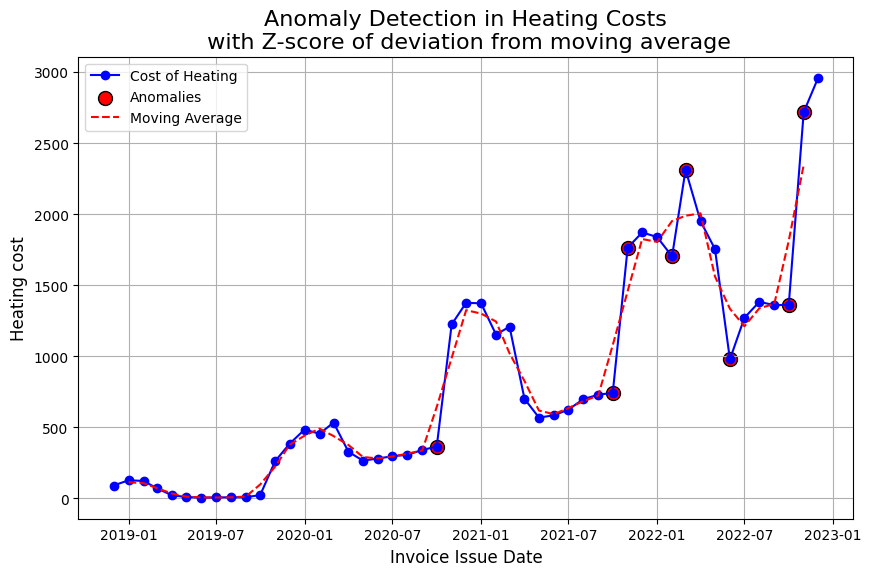

In [431]:
plot_anomalies(predicate_z_score_deviation,'Anomaly Detection in Heating Costs\n with Z-score of deviation from moving average')
plt.plot(df.index, df['centered_moving_avg'], label='Moving Average', color='red', linestyle='--');
plt.legend();

### Anomaly detection with Isolation Forest

In [432]:
from sklearn.ensemble import IsolationForest
from sklearn.inspection import DecisionBoundaryDisplay

In [433]:
model_contamination_0_1 = IsolationForest(random_state=42,contamination=0.1)
predictate_isolation_forest_contamination_0_1 =  model_contamination_0_1.fit_predict(df[['cost of heating']]) == -1
df[["cost of heating"]][predictate_isolation_forest_contamination_0_1]

,cost of heating
invoice issue date,
2022-03-01,2313
2022-04-01,1952
2022-06-01,979
2022-11-01,2719
2022-12-01,2961


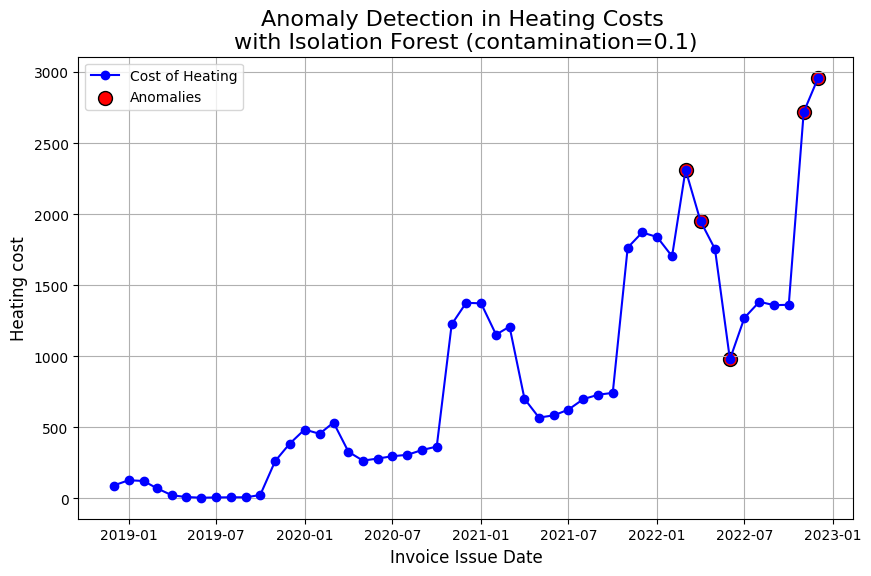

In [434]:
plot_anomalies(predictate_isolation_forest_contamination_0_1, 'Anomaly Detection in Heating Costs \nwith Isolation Forest (contamination=0.1)')

In [435]:
model_contamination_0_15 = IsolationForest(random_state=42,contamination=0.15)
predictate_isolation_forest_contamination_0_15 =  model_contamination_0_15.fit_predict(df[['cost of heating']]) == -1
df[["cost of heating"]][predictate_isolation_forest_contamination_0_15]

,cost of heating
invoice issue date,
2021-02-01,1153
2021-12-01,1872
2022-02-01,1704
2022-03-01,2313
2022-04-01,1952
2022-06-01,979
2022-11-01,2719
2022-12-01,2961


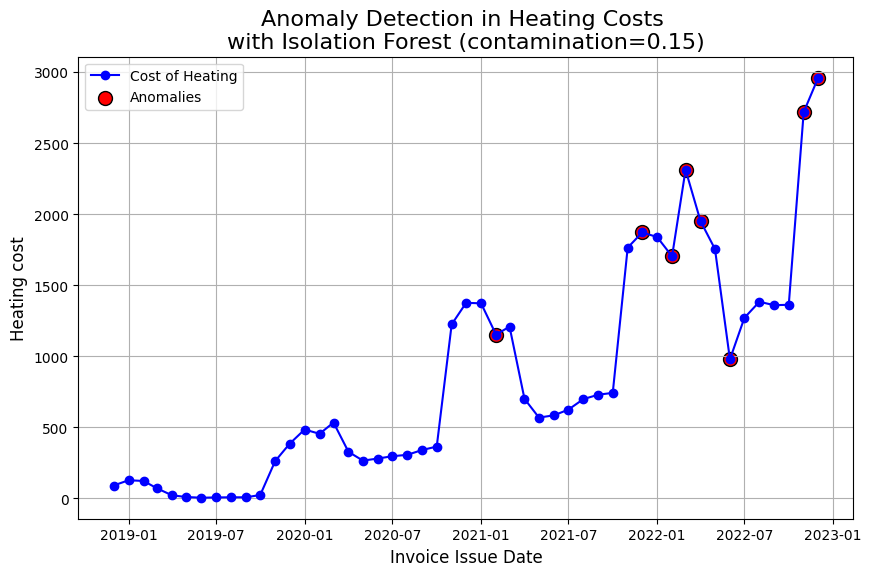

In [436]:
plot_anomalies(predictate_isolation_forest_contamination_0_15 , 'Anomaly Detection in Heating Costs \nwith Isolation Forest (contamination=0.15)')

In [437]:
anomaly_dates = ['2022-06-01', '2022-03-01']

# Detect anomalies by checking if the 'invoice_issue_date' matches any of the specified dates
df['anomalies'] = df.index.strftime('%Y-%m-%d').isin(anomaly_dates)

In [438]:
df

,cost of heating,reconstructed,trend,seasonal,resid,z_score,z_score_residual,centered_moving_avg,avg_deviation,z_score_deviation,anomalies
invoice issue date,,,,,,,,,,,
2018-12-01,91,NaN,NaN,1.668643,NaN,0.99,NaN,NaN,NaN,NaN,False
2019-01-01,128,NaN,NaN,1.707743,NaN,0.94,NaN,114.000000,14.000000,0.65,False
2019-02-01,123,NaN,NaN,1.451796,NaN,0.94,NaN,107.333333,15.666667,0.64,False
2019-03-01,71,NaN,NaN,1.623841,NaN,1.01,NaN,72.000000,1.000000,0.76,False
2019-04-01,22,NaN,NaN,1.047339,NaN,1.08,NaN,34.333333,12.333333,0.66,False
2019-05-01,10,NaN,NaN,0.825923,NaN,1.09,NaN,12.333333,2.333333,0.75,False
2019-06-01,5,5.0,75.583333,0.481074,0.137509,1.10,2.17,7.333333,2.333333,0.75,False
2019-07-01,7,7.0,102.708333,0.430526,0.158304,1.10,2.12,6.666667,0.333333,0.76,False
2019-08-01,8,8.0,131.416667,0.429698,0.141669,1.10,2.16,7.666667,0.333333,0.76,False


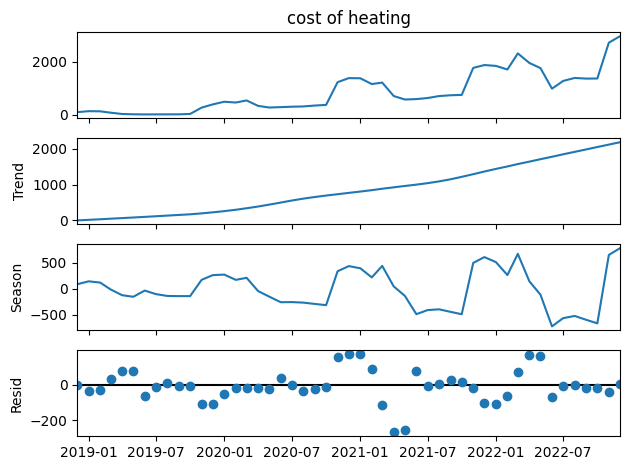

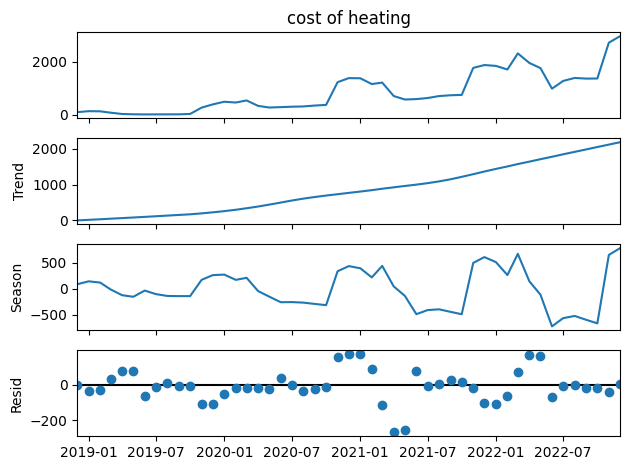

In [439]:
from statsmodels.tsa.seasonal import STL
stl = STL(df['cost of heating'], seasonal=13)
result = stl.fit()
result.plot()

In [440]:
result.resid

,resid
invoice issue date,
2018-12-01,-0.825479
2019-01-01,-35.989587
2019-02-01,-32.781460
2019-03-01,30.977957
2019-04-01,76.074070
2019-05-01,78.036172
2019-06-01,-63.795852
2019-07-01,-11.089980
2019-08-01,7.255413


In [441]:
reconstructed = result.trend + result.seasonal + result.resid

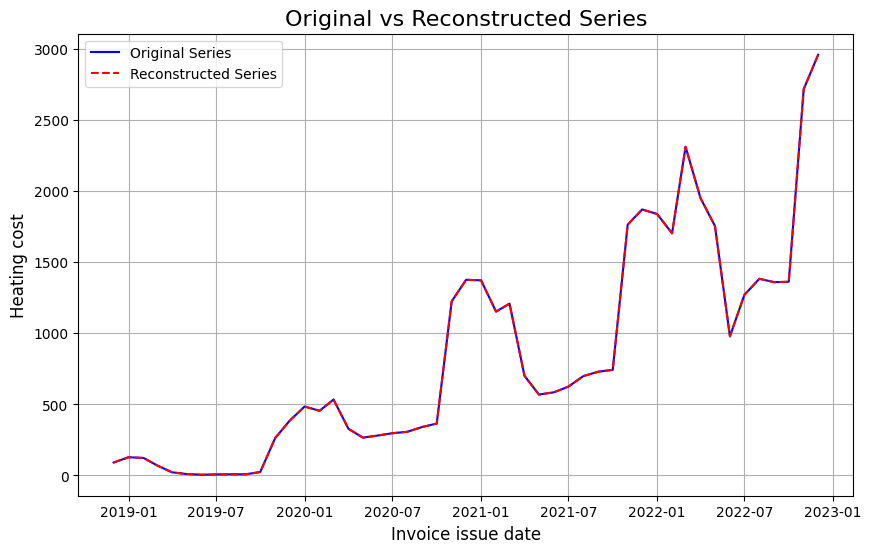

In [442]:
plt.figure(figsize=(10, 6))
plt.plot(df.index,df['cost of heating'], label='Original Series', color='blue')
plt.plot(df.index,reconstructed, label='Reconstructed Series', color='red', linestyle='--')
plt.xlabel("Invoice issue date",fontsize=12)
plt.ylabel("Heating cost",fontsize=12)
plt.legend()
plt.grid()
plt.title("Original vs Reconstructed Series",fontsize=16)
plt.show()